<a href="https://colab.research.google.com/github/Style77/lottery-numbers-data-analysis/blob/main/lottery_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winning lottery numbers data analysis
This collab was made for learning data science with entertaining project.

Dataset used: https://www.kaggle.com/datasets/stetsondone/lottery-data-winning-numbers-and-jackpots?resource=download

In [47]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Read data

df = pd.read_csv("lottery_data.csv")

In [49]:
# Reformat data

# Split the winning_numbers into separate columns
df['winning_numbers_in_list'] = df['winning_numbers'].str.split('-')

# Add columns for each individual number
for i in range(5):
    df[f'number_{i+1}'] = df['winning_numbers_in_list'].apply(lambda x: int(x[i]))

Now we will do some fun things with reformated data.

If you are more advanced you can ignore the comments, these are just for me to understand basics of functions.

# 1. Statistical Summary

In [66]:
numbers = df[['number_1', 'number_2', 'number_3', 'number_4', 'number_5']]
mean_numbers = np.mean(numbers)
median = np.median(numbers)
std_deviation_numbers = np.std(numbers)

# Here, we establish the minimum and maximum values for the x'th number.
max_num = np.max(numbers)
min_num = np.min(numbers)

# List comprehension is not needed here, we could use loop, but it's faster and I love to flex with it 😎
print("Min-max values for x'th:\n", '\n'.join([f"Number {i}: {min_num[f'number_{i}']}-{max_num[f'number_{i}']}" for i in range(1, 6)]))
print("\nMean Numbers:\n", '\n'.join([f"Number {i}: {mean_numbers[f'number_{i}']}" for i in range(1, 6)]))
print("\nMedian:", median)
print("\nStandard Deviation:\n", '\n'.join([f"Number {i}: {std_deviation_numbers[f'number_{i}']}" for i in range(1, 6)]))

Min-max values for x'th:
 Number 1: 1-51
Number 2: 2-61
Number 3: 3-64
Number 4: 7-68
Number 5: 22-69

Mean Numbers:
 Number 1: 11.92
Number 2: 23.049473684210525
Number 3: 34.6
Number 4: 45.92315789473684
Number 5: 56.96421052631579

Median: 34.0

Standard Deviation:
 Number 1: 9.527904723550327
Number 2: 11.963658775723212
Number 3: 12.664247229691027
Number 4: 12.25884816974064
Number 5: 10.110795853827923


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


# 2. Number Frequency

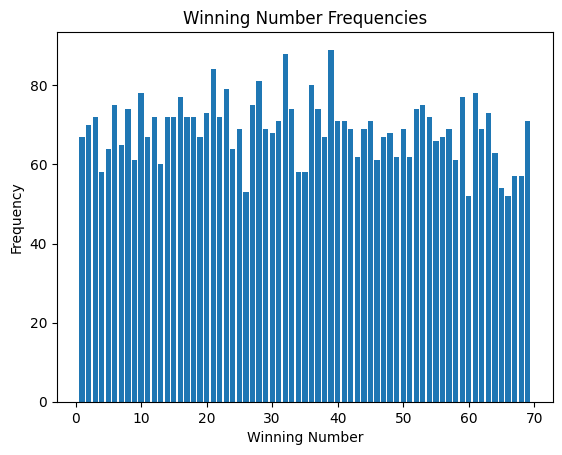

In [51]:
number_frequencies = numbers.stack().value_counts().sort_index()

plt.bar(number_frequencies.index, number_frequencies.values)
plt.xlabel("Winning Number")
plt.ylabel("Frequency")
plt.title("Winning Number Frequencies")
plt.show()

# 3. Winning numbers

In [64]:
winning_numbers = []
losing_numbers = []
for i in range(1, 6):
    winning_numbers.append(str(numbers[f'number_{i}'].value_counts().sort_values(ascending=False).index[0]))
    losing_numbers.append(str(numbers[f'number_{i}'].value_counts().sort_values(ascending=True).index[0]))

# Try this number on your next lottery!
print('Winning numbers: ', '-'.join(winning_numbers))
# And avoid this numbers!
print('Losing numbers: ', '-'.join(losing_numbers))

Winning numbers:  1-15-37-45-69
Losing numbers:  36-58-3-7-22


# 4. Which numbers were most frequent

In [53]:
print(df[["winning_numbers"]].stack().value_counts().sort_values(ascending=False))
# As we can see none were more than once (In this specific order)

17-29-31-48-49    1
5-6-37-41-54      1
10-20-25-50-53    1
7-33-39-52-55     1
23-32-39-47-49    1
                 ..
6-8-15-27-42      1
19-25-48-55-60    1
18-23-35-45-54    1
19-36-37-46-56    1
2-11-22-35-60     1
Length: 950, dtype: int64
